## RETRIEVING LIPAS SPORTS FACILITIES

This code gets the point features fron LIPAS database and keeps the ones inside the Helsinki Metropolitan Area.

In [9]:
# importing modules
import geopandas as gpd
import pandas as pd
import pyproj
import os.path 
import requests
import geojson
import shapely
import matplotlib.pyplot as plt
from pyproj import CRS

In [10]:
#retrieve data as wfs
r = requests.get("""http://lipas.cc.jyu.fi/geoserver/lipas/ows?service=wfs&version=2.0.0&request=GetFeature&typeNames=lipas:lipas_kaikki_pisteet&bbox=361500.0001438780454919,6665250.0001345984637737,403750.0001343561452813,6698000.0001281434670091,EPSG:3067&outputFormat=json""")
lipas_pisteet = gpd.GeoDataFrame.from_features(geojson.loads(r.content))
lipas_pisteet.crs = "epsg:3067"

# Fetch data from WFS using requests
r = requests.get('http://geo.stat.fi/geoserver/tilastointialueet/wfs', params=dict(service='WFS', version='2.0.0', request='GetFeature', typeName='tilastointialueet:kunta1000k', outputFormat='json'))

#get a shapefile of municipalities
municip = gpd.GeoDataFrame.from_features(geojson.loads(r.content),  crs="EPSG:3067")

#choose the study area municipalities
hma = municip.loc[(municip["nimi"] == "Espoo") | (municip["nimi"] == "Helsinki") |
                (municip["nimi"] == "Vantaa") | (municip["nimi"] == "Kauniainen")]

#retrieve the sports facilities in Helsinki Metropolitan area
lipas_data = gpd.overlay(lipas_pisteet, hma, how="intersection")


# Removing unnecessary attributes from lipas_data
lipas_data = lipas_data[["geometry","id","nimi_fi","tyyppi_nimi_fi"]]
    
lipas_data = lipas_data.reset_index()

for i in range(len(lipas_data)):

    lipas_data.loc[i, "nimi"] = lipas_data["nimi_fi"][i].split("/")[0]


lipas_data = lipas_data[["nimi_fi", "tyyppi_nimi_fi", "geometry", "nimi"]]

lipas_data

,nimi_fi,tyyppi_nimi_fi,geometry,nimi
0,Peijaksentien hiekkakenttä,Pallokenttä,POINT (394758.752 6688587.431),Peijaksentien hiekkakenttä
1,Ester Koskelaisen puiston skeittipaikka,Skeitti-/rullaluistelupaikka,POINT (395228.685 6689047.547),Ester Koskelaisen puiston skeittipaikka
2,Puistokenttä Räckhalsinpuisto,Pallokenttä,POINT (392565.651 6690159.969),Puistokenttä Räckhalsinpuisto
3,Luistelukenttä Vanha Kormuniitty,Luistelukenttä,POINT (395393.730 6683029.912),Luistelukenttä Vanha Kormuniitty
4,Puistokenttä Simonkallionpuisto,Pallokenttä,POINT (390581.000 6687369.000),Puistokenttä Simonkallionpuisto
...,...,...,...,...
4121,Gallträskin ulkokuntosali,Ulkokuntoilupaikka,POINT (374473.000 6678192.000),Gallträskin ulkokuntosali
4122,Skeittipuisto,Skeitti-/rullaluistelupaikka,POINT (373708.714 6677009.878),Skeittipuisto
4123,Kasavuoren koulun liikuntasali 2,Liikuntasali,POINT (372696.192 6677605.810),Kasavuoren koulun liikuntasali 2
4124,Granhultin koulun sali,Liikuntasali,POINT (373280.706 6677733.245),Granhultin koulun sali


<AxesSubplot:>

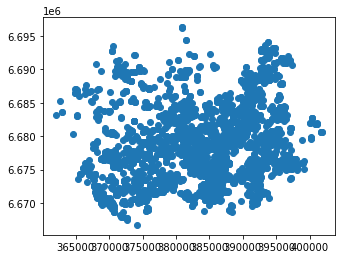

In [8]:
lipas_data.plot()

In [8]:
lipas_data.to_file("lipas.shp")